In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [151]:
df=pd.read_csv('D:\Data\income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


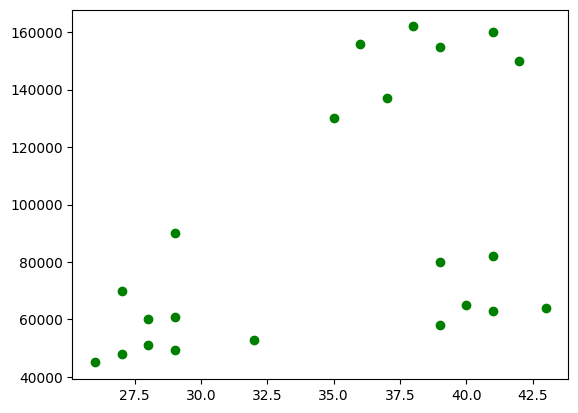

In [152]:
plt.scatter(df.Age,df['Income($)'],color='green')

In [153]:
km=KMeans(n_clusters=3)
model=km.fit(df[['Age','Income($)']])
model

KMeans(n_clusters=3)

In [154]:
Y_predicted=model.fit_predict(df[['Age','Income($)']])
Y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [155]:
model.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [156]:
df['Cluster']=Y_predicted
df

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [158]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]

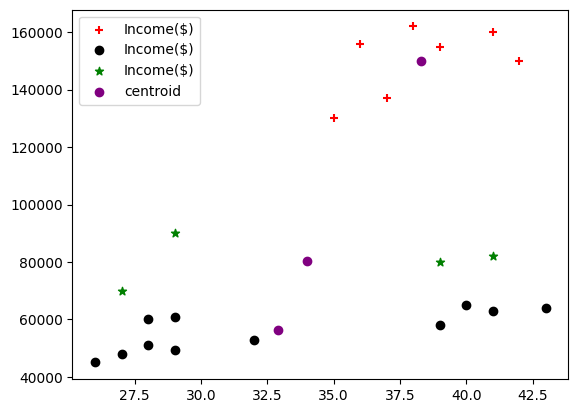

In [139]:
plt.scatter(df0.Age,df0['Income($)'],color='red',marker='+',label='Income($)')
plt.scatter(df1.Age,df1['Income($)'],color='Black',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='green',marker='*',label='Income($)')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',label='centroid')
plt.legend(loc='best')

In [140]:
scaler=MinMaxScaler()
scaler.fit(df[['Age']])


MinMaxScaler()

In [141]:
df['Age']=scaler.transform(df[['Age']])

In [142]:
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [143]:
df['Income($)']=scaler.transform(df[['Income($)']])

In [144]:
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [145]:
km=KMeans()
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [146]:
df['Cluster']=y_predicted

In [147]:
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,3
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,3
3,Ismail,0.117647,0.128205,3
4,Kory,0.941176,0.897436,6
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,6
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,4


In [148]:
km.cluster_centers_

array([[0.17647059, 0.38461538],
       [0.68627451, 0.96296296],
       [0.82352941, 0.30769231],
       [0.10084034, 0.08485958],
       [0.58823529, 0.75641026],
       [0.35294118, 0.06837607],
       [0.91176471, 0.94017094],
       [0.86764706, 0.14957265]])

In [161]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]

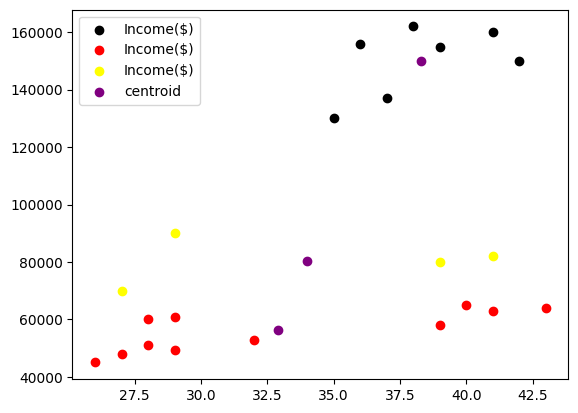

In [163]:
plt.scatter(df0.Age,df0['Income($)'],color='black',label='Income($)')
plt.scatter(df1.Age,df1['Income($)'],color='red',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='yellow',label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',label='centroid')
plt.legend()

In [164]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

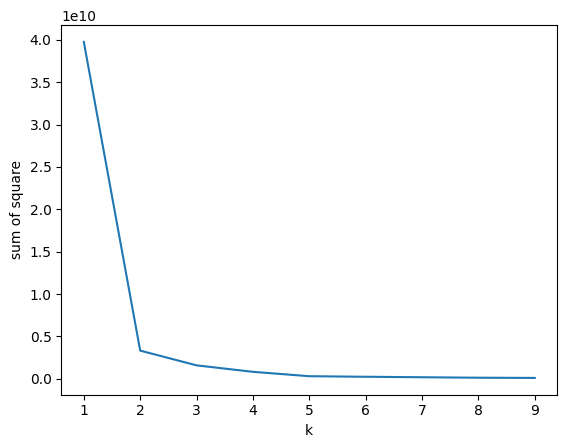

In [165]:
plt.xlabel('k')
plt.ylabel('sum of square')
plt.plot(k_rng,sse)